### Nonparametric Kernel Smoothing on Penalty

In [4]:
import pandas as pd 
import numpy as np
from scipy.sparse import dia_matrix, csc_matrix
from scipy.sparse.linalg import inv
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
import sys
from scipy.interpolate import interp1d
from scipy.stats import iqr
import time
from itertools import chain
from Kernel_Smoother import KernelSmoother

In [5]:
PATH="../../../taq_db/TAQ-Query-Scripts/data/raw_data/2020-01-02/"
sys.path.append(PATH)

DATA_FILE= "AMZN_trades_cleaned.csv"

### TAQ Data AAPL

Snippet of AAPL trades on NYSE for 1 hour

In [13]:
trades=pd.read_csv(PATH+DATA_FILE, index_col=0)
trades.index=pd.to_datetime(trades.index)
trades=trades[:500]

Text(0.5, 1.0, 'AMZN Trade Price 01/15/2020')

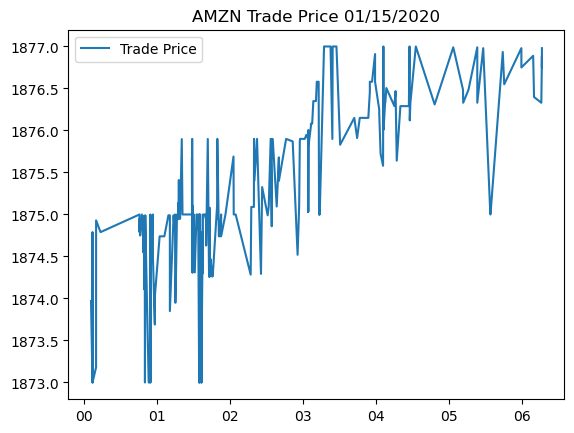

In [14]:
fig,ax=plt.subplots()
ax.plot(trades['Trade_Price'],label='Trade Price')
ax.legend()
ax.xaxis.set_major_formatter(DateFormatter('%S'))
ax.set_title("AMZN Trade Price 01/15/2020")

In [56]:
vol=trades['Trade_Volume'][trades['Trade_Volume']<10000][:250]
index=vol.index

vol

2020-01-02 09:30:00.100931     1
2020-01-02 09:30:00.100931     1
2020-01-02 09:30:00.121000     1
2020-01-02 09:30:00.121087     1
2020-01-02 09:30:00.121211     1
                              ..
2020-01-02 09:30:01.631196     5
2020-01-02 09:30:01.631199     3
2020-01-02 09:30:01.631205    15
2020-01-02 09:30:01.631209    10
2020-01-02 09:30:01.631226    10
Name: Trade_Volume, Length: 250, dtype: int64

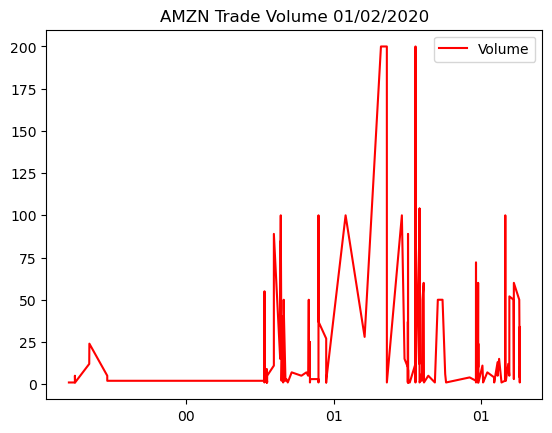

In [57]:
fig,ax=plt.subplots()
ax.set_title("AMZN Trade Volume 01/02/2020")
ax.xaxis.set_major_formatter(DateFormatter('%S'))
ax.plot(index,vol,color='red',label='Volume')
ax.legend()

### Apply Kernel Smoothing on Volume Time Series

Applies Kernel Spatial Smoothing s.t. 

$$\hat{Y}(x_j)=\frac{\sum_{t=1}^T K_\sigma(x_i,x_j)Y(x_i)}{\sum_{t=1}^T K_\sigma(x_i,x_j)}$$ 

Where our kernel function is the Gaussian Kernel

Or we can default to silvermans/scotts (however these have parametric assumptions)

In [58]:


kernel=KernelSmoother(index,vol,0)

kernel.fit()


array([[8.65879525e-02, 8.65879525e-02, 7.86601094e-02, ...,
        1.66765765e-87, 1.66599922e-87, 1.65896923e-87],
       [8.65879525e-02, 8.65879525e-02, 7.86601094e-02, ...,
        1.66765765e-87, 1.66599922e-87, 1.65896923e-87],
       [8.37176798e-02, 8.37176798e-02, 8.13569825e-02, ...,
        2.75504640e-85, 2.75234358e-85, 2.74088609e-85],
       ...,
       [6.55387210e-87, 6.55387210e-87, 1.01731943e-84, ...,
        2.20326335e-02, 2.20332874e-02, 2.20360665e-02],
       [6.54716014e-87, 6.54716014e-87, 1.01629123e-84, ...,
        2.20326335e-02, 2.20332874e-02, 2.20360668e-02],
       [6.51871074e-87, 6.51871074e-87, 1.01193293e-84, ...,
        2.20326327e-02, 2.20332869e-02, 2.20360673e-02]])

In [59]:
smooth_prior=kernel.smooth_series(kernel.fit())




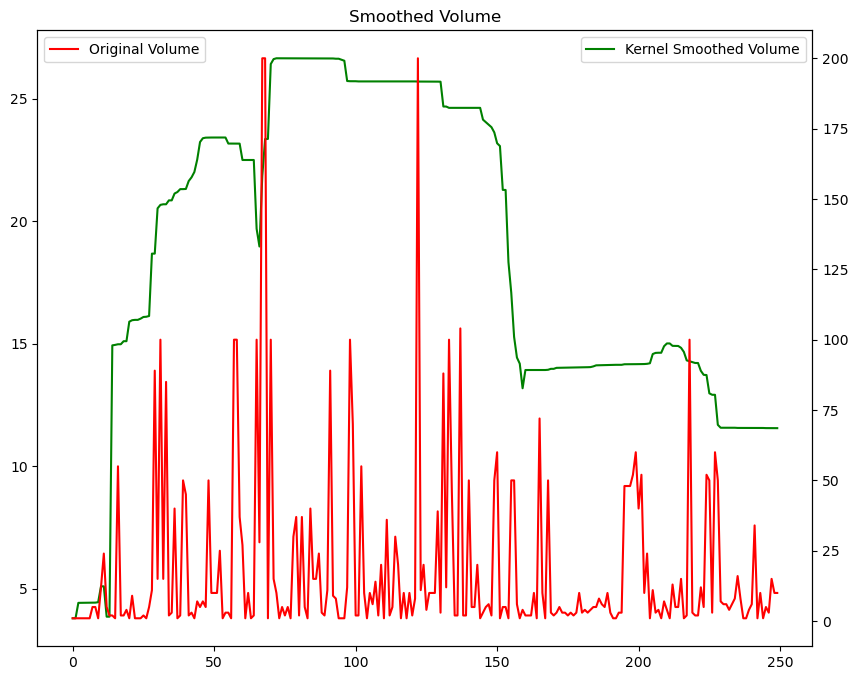

In [66]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot([(i-index[0]).total_seconds() for i in index],smooth_prior,label='Kernel Smoothed Volume',color='green')

ax.set_title("Smoothed Volume")
ax2=ax.twinx()
ax2.plot([(i-index[0]).total_seconds() for i in index],vol,color='red',label='Original Volume')
ax.legend()
ax2.legend(loc='upper left')

In [63]:
print([(i-index[0]).total_seconds() for i in index])

[0.0, 0.0, 0.020069, 0.020156, 0.02028, 0.02028, 0.020384, 0.020427, 0.020431, 0.021069, 0.069045, 0.069492, 0.130198, 0.130198, 0.663504, 0.663653, 0.663851, 0.663851, 0.664816, 0.664816, 0.671069, 0.671553, 0.671667, 0.671667, 0.672069, 0.67262, 0.672692, 0.672941, 0.695636, 0.695636, 0.717069, 0.719069, 0.719405, 0.719406, 0.721742, 0.721742, 0.726069, 0.727069, 0.729069, 0.729069, 0.729182, 0.735069, 0.738069, 0.742795, 0.756069, 0.789069, 0.806069, 0.812069, 0.814069, 0.815069, 0.817069, 0.818069, 0.818069, 0.818069, 0.819069, 0.847016, 0.847054, 0.847069, 0.847069, 0.847181, 0.873259, 0.873259, 0.873259, 0.873259, 0.873259, 0.939069, 1.003639, 1.059069, 1.079069, 1.079161, 1.130069, 1.139069, 1.150314, 1.150314, 1.150314, 1.150314, 1.150314, 1.150314, 1.150314, 1.150356, 1.150443, 1.150496, 1.150782, 1.150849, 1.150849, 1.150849, 1.150849, 1.150849, 1.150849, 1.150849, 1.15092, 1.15092, 1.151175, 1.152069, 1.152069, 1.15475, 1.156851, 1.176005, 1.176142, 1.176154, 1.176154, 1.176